In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from matplotlib import cm

import matplotlib.colors as mcolors

from matplotlib.patches import Rectangle


In [6]:
TFs_500 = {
    "STRING": [
        ["0.93", "0.92", "0.88", "0.73", "0.54", "0.61", "0.62", "0.64"],
        ["0.94", "0.92", "0.86", "0.73", "0.53", "0.52", "0.64", "0.63"],
        ["0.94", "0.92", "0.86", "0.76", "0.51", "0.57", "0.61", "0.61"],
        ["0.95", "0.92", "0.87", "0.76", " ", "0.58", "0.59", "0.61"],
        ["0.92", "0.91", "0.86", "0.63", "0.56", " ", "0.63", "0.7"],
        ["0.91", "0.89", "0.81", "0.69", "0.64", "0.58", "0.64", "0.75"],
        ["0.83", "0.85", "0.81", "0.72", " ", "0.64", "0.6", "0.7"],
    ],
    "Cell-type-specific ChIP-seq": [
        ["0.86", "0.85", "0.79", "0.67", "0.68", " ", "0.51", " "],
        ["0.88", "0.82", "0.83", "0.8", "0.64", "0.52", " ", "0.54"],
        ["0.77", "0.7", "0.67", "0.52", "0.54", " ", " ", " "],
        ["0.87", "0.84", "0.8", "0.81", "0.73", "0.51", "0.53", " "],
        ["0.9", "0.83", "0.79", "0.82", "0.67", "0.56", "0.64", "0.52"],
        ["0.92", "0.89", "0.84", "0.83", "0.69", "0.64", " ", "0.53"],
        ["0.86", "0.84", "0.81", "0.77", "0.67", "0.58", "0.64", "0.52"],
    ],
    "Non-specific ChIP-seq": [
        ["0.74", "0.74", "0.69", "0.63", "0.53", " ", " ", " "],
        ["0.78", "0.75", "0.69", "0.63", " ", " ", " ", " "],
        ["0.76", "0.82", "0.75", "0.67", "0.62", "0.58", "0.52", "0.55"],
        ["0.79", "0.76", "0.71", "0.67", "0.62", "0.59", "0.58", "0.56"],
        ["0.84", "0.76", "0.72", "0.56", "0.6", "0.54", "0.59", "0.64"],
        ["0.77", "0.76", "0.71", "0.6", "0.68", "0.75", "0.61", "0.71"],
        ["0.8", "0.67", "0.64", "0.6", "0.56", "0.61", "0.65", "0.65"],
    ],
    "LOF/GOF": [
        ["0.77", "0.79", "0.74", "0.71", "0.54", "0.59", "0.52", "0.59"],
    ],
}
TFs_1000 = {
    "STRING": [
        ["0.92", "0.91", "0.87", "0.75", " ", "0.58", "0.61", "0.64"],
        ["0.93", "0.89", "0.88", "0.75", "0.55", " ", "0.58", "0.63"],
        ["0.93", "0.92", "0.88", "0.78", "0.54", " ", " ", "0.6"],
        ["0.95", "0.9", "0.88", "0.79", "0.6", "0.64", "0.56", "0.61"],
        ["0.9", "0.89", "0.88", "0.65", "0.58", "0.6", "0.61", "0.7"],
        ["0.93", "0.88", "0.86", "0.69", "0.56", "0.61", "0.58", "0.75"],
        ["0.89", "0.83", "0.78", "0.71", "0.67", "0.76", "0.72", "0.71"],
    ],
    "Cell-type-specific ChIP-seq": [
        ["0.87", "0.8", "0.78", "0.68", "0.72", "0.56", "0.67", " "],
        ["0.87", "0.84", "0.85", "0.81", "0.66", "0.63", "0.57", "0.54"],
        ["0.79", "0.78", "0.73", "0.52", "0.56", " ", " ", "0.52"],
        ["0.87", "0.84", "0.82", "0.82", "0.73", "0.62", "0.59", " "],
        ["0.92", "0.87", "0.84", "0.84", "0.72", " ", "0.53", " "],
        ["0.92", "0.92", "0.87", "0.84", "0.69", "0.66", "0.58", "0.51"],
        ["0.86", "0.86", "0.81", "0.77", "0.62", "0.57", " ", "0.52"],
    ],
    "Non-specific ChIP-seq": [
        ["0.73", "0.91", "0.87", "0.75", " ", "0.58", "0.61", "0.64"],
        ["0.76", "0.89", "0.88", "0.75", "0..55", " ", "0.58", "0.63"],
        ["0.8", "0.92", "0.88", "0.78", "0.54", " ", " ", "0.6"],
        ["0.84", "0.9", "0.88", "0.79", "0.6", "0.64", "0.56", "0.61"],
        ["0.79", "0.89", "0.88", "0.65", "0.58", "0.6", "0.61", "0.7"],
        ["0.79", "0.88", "0.86", "0.69", "0.56", "0.61", "0.58", "0.75"],
        ["0.73", "0.83", "0.78", "0.71", "0.67", "0.76", "0.72", "0.75"],
    ],
    "LOF/GOF": [
        ["0.88", "0.81", "0.78", "0.72", "0.67", "0.64", "0.57", "0.59"],
    ],
}

aupr_TFs_500 = {
    "STRING": [
        ["0.32", "0.2", "0.1", "0.05", "0.02", "0.04", "0.03", "0.04"],
        ["0.34", "0.22", "0.18", "0.05", "0.06", "0.05", "0.06", "0.04"],
        ["0.43", "0.29", "0.28", "0.09", "0.06", "0.04", "0.04", "0.05"],
        ["0.3", "0.18", "0.16", "0.05", "0.04", "0.05", "0.04", "0.05"],
        ["0.3", "0.22", "0.19", "0.04", "0.12", "0.09", "0.12", "0.12"],
        ["0.41", "0.35", "0.03", "0.07", "0.29", "0.26", "0.27", "0.27"],
        ["0.57", "0.32", "0.29", "0.09", "0.14", "0.32", "0.29", "0.33"],
    ],
    "Cell-type-specific ChIP-seq": [
        ["0.55", "0.52", "0.48", "0.34", "0.25", "0.13", "0.15", "0.15"],
        ["0.79", "0.75", "0.69", "0.65", "0.46", "0.39", "0.35", "0.33"],
        ["0.15", "0.25", "0.11", "0.06", "0.06", "0.06", "0.05", "0.06"],
        ["0.74", "0.76", "0.75", "0.64", "0.48", "0.46", "0.49", "0.31"],
        ["0.92", "0.88", "0.88", "0.8", "0.74", "0.76", "0.71", "0.56"],
        ["0.93", "0.89", "0.88", "0.78", "0.68", "0.64", "0.66", "0.53"],
        ["0.84", "0.85", "0.81", "0.7", "0.64", "0.59", "0.64", "0.5"],
    ],
    "Non-specific ChIP-seq": [
        ["0.05", "0.06", "0.04", "0.02", "0.02", "0.02", "0.02", "0.02"],
        ["0.06", "0.05", "0.03", "0.02", "0.02", "0.02", "0.01", "0.02"],
        ["0.1", "0.16", "0.13", "0.03", "0.04", "0.02", "0.02", "0.02"],
        ["0.11", "0.09", "0.05", "0.03", "0.02", "0.02", "0.02", "0.02"],
        ["0.12", "0.12", "0.12", "0.04", "0.06", "0.05", "0.05", "0.06"],
        ["0.2", "0.22", "0.19", "0.04", "0.11", "0.12", "0.12", "0.12"],
        ["0.21", "0.15", "0.12", "0.06", "0.14", "0.09", "0.11", "0.13"],
    ],
    "LOF/GOF": [
         ["0.22","0.5","0.45","0.27","0.28","0.34","0.35","0.31"],

    ],
}
aupr_TFs_1000 = {
    "STRING": [
        ["0.27", "0.19", "0.12", "0.05", "0.02", "0.05", "0.04", "0.03"],
        ["0.31", "0.18", "0.15", "0.05", "0.04", "0.03", "0.04", "0.02"],
        ["0.38", "0.27", "0.27", "0.08", "0.07", "0.05", "0.05", "0.06"],
        ["0.34", "0.11", "0.13", "0.05", "0.04", "0.05", "0.03", "0.02"],
        ["0.26", "0.23", "0.21", "0.04", "0.15", "0.13", "0.13", "0.12"],
        ["0.43", "0.31", "0.25", "0.06", "0.23", "0.26", "0.23", "0.25"],
        ["0.53", "0.31", "0.24", "0.08", "0.26", "0.3", "0.28", "0.32"],
    ],
    "Cell-type-specific ChIP-seq": [
        ["0.57", "0.51", "0.5", "0.34", "0.27", "0.19", "0.16", "0.15"],
        ["0.77", "0.78", "0.7", "0.66", "0.49", "0.46", "0.53", "0.38"],
        ["0.16", "0.21", "0.12", "0.05", "0.05", "0.06", "0.05", "0.05"],
        ["0.74", "0.78", "0.75", "0.65", "0.5", "0.46", "0.51", "0.31"],
        ["0.93", "0.93", "0.89", "0.81", "0.77", "0.73", "0.69", "0.54"],
        ["0.93", "0.93", "0.91", "0.81", "0.73", "0.64", "0.61", "0.53"],
        ["0.82", "0.86", "0.82", "0.68", "0.56", "0.48", "0.52", "0.48"],
    ],
    "Non-specific ChIP-seq": [
        ["0.04", "0.04", "0.03", "0.02", "0.03", "0.02", "0.02", "0.01"],
        ["0.05", "0.05", "0.04", "0.02", "0.02", "0.02", "0.01", "0.01"],
        ["0.09", "0.15", "0.1", "0.02", "0.03", "0.03", "0.02", "0.02"],
        ["0.08", "0.08", "0.05", "0.02", "0.02", "0.02", "0.02", "0.02"],
        ["0.11", "0.16", "0.1", "0.02", "0.02", "0.06", "0.05", "0.05"],
        ["0.21", "0.23", "0.21", "0.05", "0.1", "0.15", "0.12", "0.12"],
        ["0.21", "0.12", "0.1", "0.05", "0.13", "0.13", "0.14", "0.12"],
    ],
    "LOF/GOF": [["0.58", "0.49", "0.45", "0.27", "0.34", "0.35", "0.31", "0.3"]],
}

/tmp/ipykernel_43776/2017467892.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap(cmap_name, n)
/tmp/ipykernel_43776/2017467892.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  _DS_COLORS = cm.get_cmap("tab20").colors
/tmp/ipykernel_43776/2017467892.py:85: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap(CMAP).copy()
/tmp/ipykernel_43776/2017467892.py:85: MatplotlibDeprecationWarning: The get_cmap function was deprecated

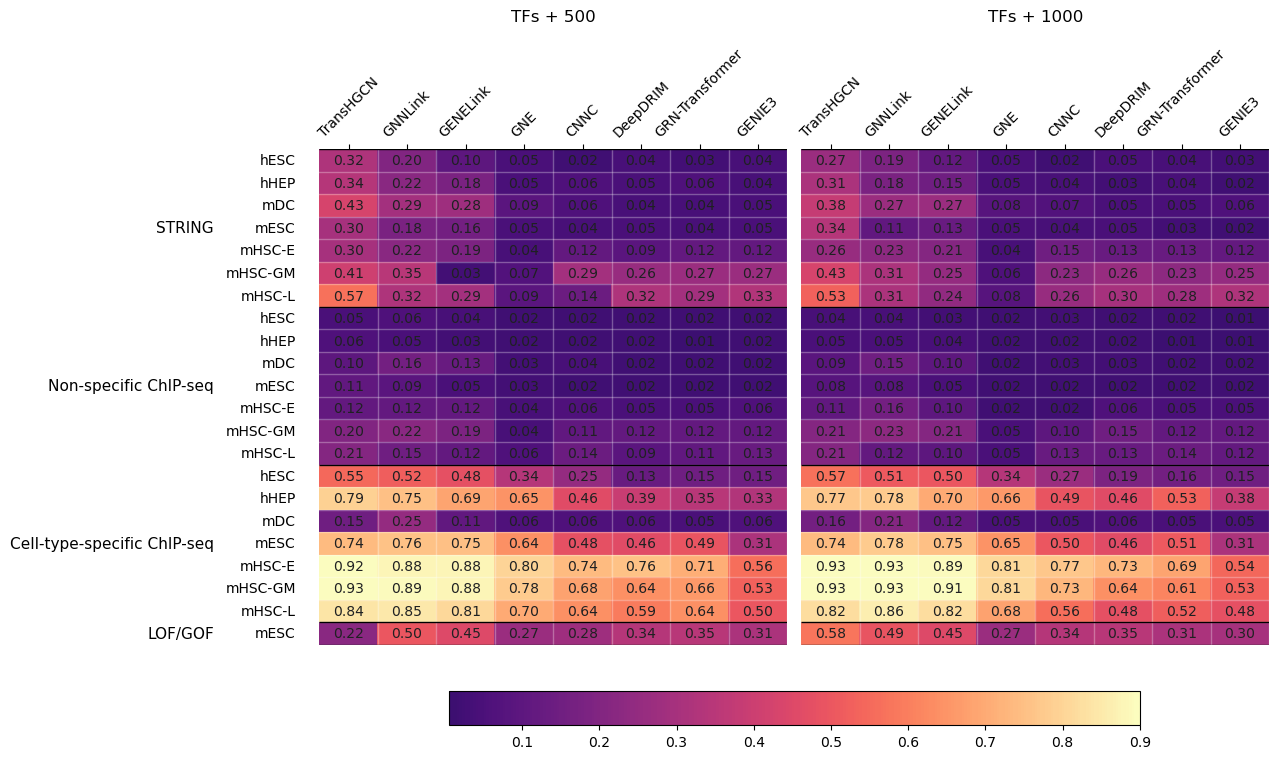

In [7]:


# ================== 你的配置 ==================
METHODS = [
    "TransHGCN","GNNLink","GENELink","GNE",
    "CNNC","DeepDRIM","GRN-Transformer","GENIE3",
]
DATASETS = ["hESC","hHEP","mDC","mESC","mHSC-E","mHSC-GM","mHSC-L"]
GROUPS = ["STRING","Non-specific ChIP-seq","Cell-type-specific ChIP-seq","LOF/GOF"]

def truncate_colormap(cmap_name="magma", minval=0.5, maxval=1.0, n=256):
    cmap = cm.get_cmap(cmap_name, n)
    return mcolors.LinearSegmentedColormap.from_list(
        f"trunc({cmap_name},{minval:.2f},{maxval:.2f})",
        cmap(np.linspace(minval, maxval, n)),
    )

CMAP = truncate_colormap("magma", 0.2, 1.0)
VMIN, VMAX = 0.005, 0.9
GAMMA = 0.5
NORM = mcolors.PowerNorm(gamma=GAMMA, vmin=VMIN, vmax=VMAX)

# 颜色：每个 dataset 一个小色块
_DS_COLORS = cm.get_cmap("tab20").colors
DATASET_COLOR_MAP = {name: _DS_COLORS[i % len(_DS_COLORS)] for i, name in enumerate(DATASETS)}

# ====== 工具函数 ======
_num_re = re.compile(r"^\s*\d*\.?\d+\s*$")

def dict_to_matrix(block):
    """把 {group: rows} 变成矩阵，并返回行标签和每个 group 的跨度索引"""
    rows, y_labels, group_spans = [], [], []
    start = 0
    for g in GROUPS:
        if g == "LOF/GOF":
            vals = [float(x) if _num_re.match(str(x)) else np.nan for x in block[g][0]]
            rows.append(vals)
            y_labels.append("mESC")
            group_spans.append((start, start + 1))
            start += 1
        else:
            for name, row in zip(DATASETS, block[g]):
                vals = [float(x) if _num_re.match(str(x)) else np.nan for x in row]
                rows.append(vals)
                y_labels.append(name)
            group_spans.append((start, start + len(DATASETS)))
            start += len(DATASETS)
    return np.array(rows, dtype=float), y_labels, group_spans

def _add_left_labels_strip(ax, y_labels, group_spans, show_group_labels=True):
    """
    在 ax 左侧加一个窄轴，绘制 DATASETS 标签和颜色小方块，
    并可在组块中间写 GROUPS 名称。
    """
    n_rows = len(y_labels)
    # 在主轴左侧开一个 inset 轴：x 从 -0.2 开始，宽 0.18（可微调）
    lab_ax = ax.inset_axes(bounds=(-0.20, 0.0, 0.18, 1.0), transform=ax.transAxes)
    lab_ax.set_xlim(0, 1)
    lab_ax.set_ylim(-0.5, n_rows - 0.5)
    lab_ax.axis("off")

    # 行高单位：和主图像素坐标一致（y 方向）
    for i, name in enumerate(y_labels):
        # 颜色方块（宽高 0.08 × 0.7 行高，可根据审美微调）
        color = DATASET_COLOR_MAP.get(name, "#c0c0c0")
        lab_ax.add_patch(Rectangle((0.02, i - 0.35), 0.08, 0.7, color=color, ec="none"))
        # 文本（在色块右侧）
        lab_ax.text(0.12, i, name, va="center", ha="left", fontsize=10, color="#333333")

    # 分组名称：在每个组的中点位置标注（更靠左一些）
    if show_group_labels:
        for (s, e), gname in zip(group_spans, GROUPS):
            cy = (s + e - 1) / 2
            lab_ax.text(-0.02, cy, gname, va="center", ha="right", fontsize=10, color="#444444")

def draw_one(
    ax,
    matrix,
    y_labels,
    group_spans,
    title,
    show_group_labels=True,
    show_y_ticks=True,
    show_dataset_labels=False,
):
    # 获取 colormap 并设置 NaN 颜色
    cmap = cm.get_cmap(CMAP).copy()
    cmap.set_bad(color="#363839")  # NaN 的颜色

    # 把 NaN 屏蔽掉
    matrix_masked = np.ma.masked_invalid(matrix)
    im = ax.imshow(matrix_masked, cmap=cmap, vmin=VMIN, vmax=VMAX, aspect="auto")

    # 栅格
    ax.set_xticks(np.arange(matrix.shape[1]) + 0.5, minor=True)
    ax.set_yticks(np.arange(matrix.shape[0]) + 0.5, minor=True)
    ax.grid(which="minor", color="w", linewidth=1, alpha=0.3)
    ax.tick_params(which="minor", bottom=False, left=False)

    # 模型名放到上方
    ax.set_xticks(np.arange(matrix.shape[1]), METHODS)
    ax.tick_params(
        axis="x", rotation=45, labeltop=True, top=True, labelbottom=False, bottom=False
    )

    # y 轴刻度
    if show_y_ticks:
        ax.set_yticks(np.arange(matrix.shape[0]), y_labels)
    else:
        ax.set_yticks([])

    # 数值标注
    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[1]):
            v = matrix[i, j]
            if not np.isnan(v):
                ax.text(
                    j,
                    i,
                    f"{v:.2f}",
                    ha="center",
                    va="center",
                    color="#1F2122",
                    fontsize=10,
                )

    # 组分隔线与组名
    for (s, e), name in zip(group_spans, GROUPS):
        ax.hlines(s - 0.5, -0.5, matrix.shape[1] - 0.5, colors="k", linewidth=1)
        if show_group_labels:
            cy = (s + e - 1) / 2
            ax.text(-2.3, cy, name, ha="right", va="center", fontsize=11, rotation=0)

        # 在左图显示 DATASETS
        if show_dataset_labels:
            if name != "LOF/GOF":
                for idx, dataset in enumerate(DATASETS):
                    ax.text(
                        -0.9,
                        s + idx,
                        dataset,
                        ha="right",
                        va="center",
                        fontsize=10,
                        color="black",
                    )
            else:
                ax.text(
                    -0.9, s, "mESC", ha="right", va="center", fontsize=10, color="black"
                )

    ax.hlines(
        group_spans[-1][1] - 0.5, -0.5, matrix.shape[1] - 0.5, colors="k", linewidth=1
    )
    ax.set_title(title, fontsize=12, pad=18)

    for spine in ax.spines.values():
        spine.set_visible(False)
    return im



mat500, ylab, spans = dict_to_matrix(aupr_TFs_500) 
mat1000, _, _ = dict_to_matrix(aupr_TFs_1000)

# =============== 画图 ===============
fig, axes = plt.subplots(1, 2, figsize=(12.5, 8), sharey=True, gridspec_kw={"wspace": 0.03})

im1 = draw_one(
    axes[0],
    mat500,
    ylab,
    spans,
    "TFs + 500",
    show_group_labels=True,
    show_y_ticks=False,
    show_dataset_labels=True,
)
im2 = draw_one(
    axes[1],
    mat1000,
    ylab,
    spans,
    "TFs + 1000",
    show_group_labels=False,
    show_y_ticks=False,
)

# 左侧留白增大以容纳 strip；底部给色条预留空间
fig.subplots_adjust(left=0.22, right=0.98, top=0.92, bottom=0.20)

# 统一底部色条（与 NORM 保持一致）
cbar = fig.colorbar(im2, ax=axes.ravel().tolist(),
                    orientation="horizontal", fraction=0.06, pad=0.08)

plt.show()


/tmp/ipykernel_43776/4204850537.py:52: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap(CMAP).copy()
/tmp/ipykernel_43776/4204850537.py:52: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap(CMAP).copy()
findfont: Font family 'SimSun' not found.
findfont: Font family 'SimSun' not found.
findfont: Font family 'SimSun' not found.
findfont: Font family 'SimSun' not found.
findfont: Font family 'SimSun' not found.
findfont: Font family 'SimSun' not found.
findfont: Font family 'SimSun' not found.
findfont: Font family 'SimSun' not found.
findfont: Font family 'SimSun' not found.
findfont: Font family 'SimSun' n

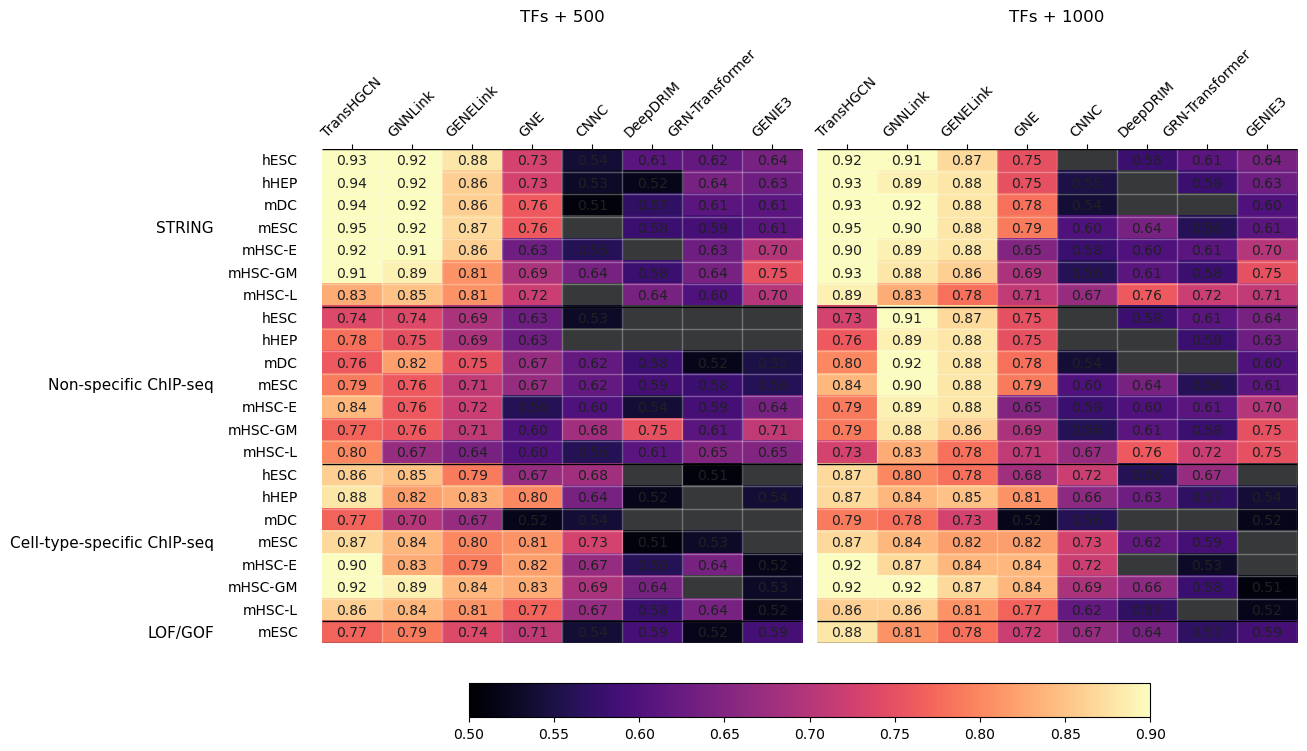

In [8]:

METHODS = [
    "TransHGCN",
    "GNNLink",
    "GENELink",
    "GNE",
    "CNNC",
    "DeepDRIM",
    "GRN-Transformer",
    "GENIE3",
]
DATASETS = ["hESC", "hHEP", "mDC", "mESC", "mHSC-E", "mHSC-GM", "mHSC-L"]
GROUPS = ["STRING", "Non-specific ChIP-seq", "Cell-type-specific ChIP-seq", "LOF/GOF"]

CMAP = "magma"  # 颜色带，想换就改这里
VMIN, VMAX = 0.5, 0.9  # 与图一致的色条范围

# ====== 工具函数 ======
_num_re = re.compile(r"^\s*\d*\.?\d+\s*$")


def dict_to_matrix(block):
    rows, y_labels, group_spans = [], [], []
    start = 0
    for g in GROUPS:
        if g == "LOF/GOF":
            vals = [float(x) if _num_re.match(str(x)) else np.nan for x in block[g][0]]
            rows.append(vals)
            y_labels.append("mESC")
            group_spans.append((start, start + 1))
            start += 1
        else:
            for name, row in zip(DATASETS, block[g]):
                vals = [float(x) if _num_re.match(str(x)) else np.nan for x in row]
                rows.append(vals)
                y_labels.append(name)
            group_spans.append((start, start + len(DATASETS)))
            start += len(DATASETS)
    return np.array(rows, dtype=float), y_labels, group_spans


def draw_one(
    ax,
    matrix,
    y_labels,
    group_spans,
    title,
    show_group_labels=True,
    show_y_ticks=True,
    show_dataset_labels=False,
):
    # 获取 colormap 并设置 NaN 颜色
    cmap = cm.get_cmap(CMAP).copy()
    cmap.set_bad(color="#363839")  # NaN 的颜色

    # 把 NaN 屏蔽掉
    matrix_masked = np.ma.masked_invalid(matrix)
    im = ax.imshow(matrix_masked, cmap=cmap, vmin=VMIN, vmax=VMAX, aspect="auto")

    # 栅格
    ax.set_xticks(np.arange(matrix.shape[1]) + 0.5, minor=True)
    ax.set_yticks(np.arange(matrix.shape[0]) + 0.5, minor=True)
    ax.grid(which="minor", color="w", linewidth=1, alpha=0.3)
    ax.tick_params(which="minor", bottom=False, left=False)

    # 模型名放到上方
    ax.set_xticks(np.arange(matrix.shape[1]), METHODS)
    ax.tick_params(
        axis="x", rotation=45, labeltop=True, top=True, labelbottom=False, bottom=False
    )

    # y 轴刻度
    if show_y_ticks:
        ax.set_yticks(np.arange(matrix.shape[0]), y_labels)
    else:
        ax.set_yticks([])

    # 数值标注
    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[1]):
            v = matrix[i, j]
            if not np.isnan(v):
                ax.text(
                    j,
                    i,
                    f"{v:.2f}",
                    ha="center",
                    va="center",
                    color="#1F2122",
                    fontsize=10,
                )

    # 组分隔线与组名
    for (s, e), name in zip(group_spans, GROUPS):
        ax.hlines(s - 0.5, -0.5, matrix.shape[1] - 0.5, colors="k", linewidth=1)
        if show_group_labels:
            cy = (s + e - 1) / 2
            ax.text(-2.3, cy, name, ha="right", va="center", fontsize=11, rotation=0)

        # 在左图显示 DATASETS
        if show_dataset_labels:
            if name != "LOF/GOF":
                for idx, dataset in enumerate(DATASETS):
                    ax.text(
                        -0.9,
                        s + idx,
                        dataset,
                        ha="right",
                        va="center",
                        fontsize=10,
                        color="black",
                    )
            else:
                ax.text(
                    -0.9, s, "mESC", ha="right", va="center", fontsize=10, color="black"
                )

    ax.hlines(
        group_spans[-1][1] - 0.5, -0.5, matrix.shape[1] - 0.5, colors="k", linewidth=1
    )
    ax.set_title(title, fontsize=12, pad=18)

    for spine in ax.spines.values():
        spine.set_visible(False)
    return im


# ====== 数据矩阵 ======
mat500, ylab, spans = dict_to_matrix(TFs_500)
mat1000, _, _ = dict_to_matrix(TFs_1000)

# ====== 画图（左侧空白更大，模型名在上方，右图不显示细胞名与组名） ======
fig, axes = plt.subplots(
    1, 2, figsize=(12.5, 8), sharey=True, gridspec_kw={"wspace": 0.03}
)



# 左图：显示 y 轴和组名；给左侧留更大空白
im1 = draw_one(
    axes[0], mat500, ylab, spans, "TFs + 500", show_group_labels=True, show_y_ticks=True,show_dataset_labels=True
)

# 右图：不显示 y 轴与组名
im2 = draw_one(
    axes[1],
    mat1000,
    ylab,
    spans,
    "TFs + 1000",
    show_group_labels=False,
    show_y_ticks=False,
    
)
# 调整整体边距：left 值越大 → 左侧留白越多（可再增大）
fig.subplots_adjust(left=0.20, right=0.98, top=0.93, bottom=0.22)

# 统一底部色条
cbar = fig.colorbar(
    im2, ax=axes.ravel().tolist(), orientation="horizontal", fraction=0.06, pad=0.07
)





plt.show()

/tmp/ipykernel_43776/715303319.py:33: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("viridis").copy()
findfont: Font family 'SimSun' not found.
findfont: Font family 'SimSun' not found.
findfont: Font family 'SimSun' not found.
findfont: Font family 'SimSun' not found.
findfont: Font family 'SimSun' not found.
findfont: Font family 'SimSun' not found.
findfont: Font family 'SimSun' not found.
findfont: Font family 'SimSun' not found.
findfont: Font family 'SimSun' not found.
findfont: Font family 'SimSun' not found.
findfont: Font family 'SimSun' not found.
findfont: Font family 'SimSun' not found.
findfont: Font family 'SimSun' not found.
findfont: Font family 'SimSun' not found.
findfont: Font family 'SimSun' not found.
findfont: Font family 'SimSun' not found.
findfont: Font family 'SimSun

8x8 Gene Expression Matrix:
       Cell1  Cell2  Cell3  Cell4  Cell5  Cell6  Cell7  Cell8
Gene1      7      3      0      5      7      4      9      0
Gene2      0      4      0      6      5      0      2      7
Gene3      1      1      4      4      5      8      1     10
Gene4      7      8      1      9      0      7      3      3
Gene5      0      5      9      8      5      9      0      9
Gene6      4      2      0      2      2      0      9      8
Gene7      2      0      2      0      4      8      9      0
Gene8      2      3      0      1      2     10      9      4


findfont: Font family 'SimSun' not found.
findfont: Font family 'SimSun' not found.
findfont: Font family 'SimSun' not found.
findfont: Font family 'SimSun' not found.
findfont: Font family 'SimSun' not found.
findfont: Font family 'SimSun' not found.
findfont: Font family 'SimSun' not found.
findfont: Font family 'SimSun' not found.
findfont: Font family 'SimSun' not found.
findfont: Font family 'SimSun' not found.
findfont: Font family 'SimSun' not found.
findfont: Font family 'SimSun' not found.
findfont: Font family 'SimSun' not found.
findfont: Font family 'SimSun' not found.
findfont: Font family 'SimSun' not found.
findfont: Font family 'SimSun' not found.
findfont: Font family 'SimSun' not found.
findfont: Font family 'SimSun' not found.
findfont: Font family 'SimSun' not found.
findfont: Font family 'SimSun' not found.
findfont: Font family 'SimSun' not found.
findfont: Font family 'SimSun' not found.
findfont: Font family 'SimSun' not found.
findfont: Font family 'SimSun' not

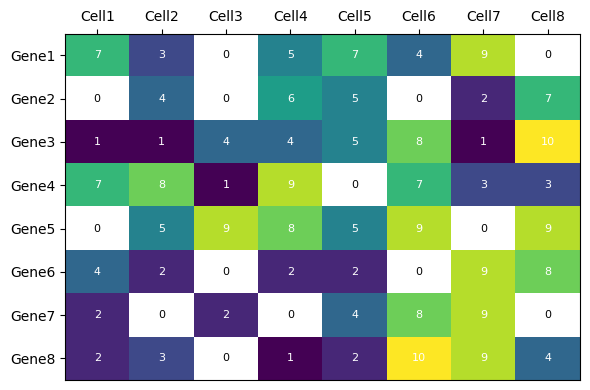

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm

# 1. 固定 8×8 基因表达矩阵数据（全部为整数）
gene_expression = np.array(
    [
        [7, 3, 0, 5, 7, 4, 9, 0],
        [0, 4, 0, 6, 5, 0, 2, 7],
        [1, 1, 4, 4, 5, 8, 1, 10],
        [7, 8, 1, 9, 0, 7, 3, 3],
        [0, 5, 9, 8, 5, 9, 0, 9],
        [4, 2, 0, 2, 2, 0, 9, 8],
        [2, 0, 2, 0, 4, 8, 9, 0],
        [2, 3, 0, 1, 2, 10, 9, 4],
    ]
)

# 2. 输出为带行列标签的矩阵
genes = [f"Gene{i + 1}" for i in range(8)]
cells = [f"Cell{i + 1}" for i in range(8)]
df = pd.DataFrame(gene_expression, index=genes, columns=cells)
print("8x8 Gene Expression Matrix:")
print(df)

# 3. 掩码 0 和 NaN
masked_data = np.ma.masked_where(
    (gene_expression == 0) | np.isnan(gene_expression), gene_expression
)

# 4. colormap 设定白色
cmap = cm.get_cmap("viridis").copy()
cmap.set_bad(color="white")

# 5. 创建图像
fig, ax = plt.subplots(figsize=(6, 4))
im = ax.imshow(masked_data, cmap=cmap, aspect="auto")

# 6. 在每个格子内显示整数
nrows, ncols = gene_expression.shape
for i in range(nrows):
    for j in range(ncols):
        val = gene_expression[i, j]
        if val == 0 or np.isnan(val):
            text_color = "black"  # 白色格子上用黑字
            display_val = "0"
        else:
            text_color = "white"  # 深色格子上用白字
            display_val = str(val)
        ax.text(
            j, i, display_val, ha="center", va="center", color=text_color, fontsize=8
        )

# 7. 设置坐标轴
ax.set_xticks(range(8))
ax.set_xticklabels(cells)
ax.set_yticks(range(8))
ax.set_yticklabels(genes)

# 8. 把X轴标签放到上方
ax.xaxis.set_ticks_position("top")
ax.xaxis.set_label_position("top")

# 9. 优化布局
plt.tight_layout()
plt.show()


findfont: Font family 'SimSun' not found.
findfont: Font family 'SimSun' not found.
findfont: Font family 'SimSun' not found.
findfont: Font family 'SimSun' not found.
findfont: Font family 'SimSun' not found.
findfont: Font family 'SimSun' not found.
findfont: Font family 'SimSun' not found.
findfont: Font family 'SimSun' not found.
findfont: Font family 'SimSun' not found.
findfont: Font family 'SimSun' not found.
findfont: Font family 'SimSun' not found.
findfont: Font family 'SimSun' not found.
findfont: Font family 'SimSun' not found.
findfont: Font family 'SimSun' not found.
findfont: Font family 'SimSun' not found.
findfont: Font family 'SimSun' not found.
findfont: Font family 'SimSun' not found.
findfont: Font family 'SimSun' not found.
findfont: Font family 'SimSun' not found.
findfont: Font family 'SimSun' not found.
findfont: Font family 'SimSun' not found.
findfont: Font family 'SimSun' not found.
findfont: Font family 'SimSun' not found.
findfont: Font family 'SimSun' not

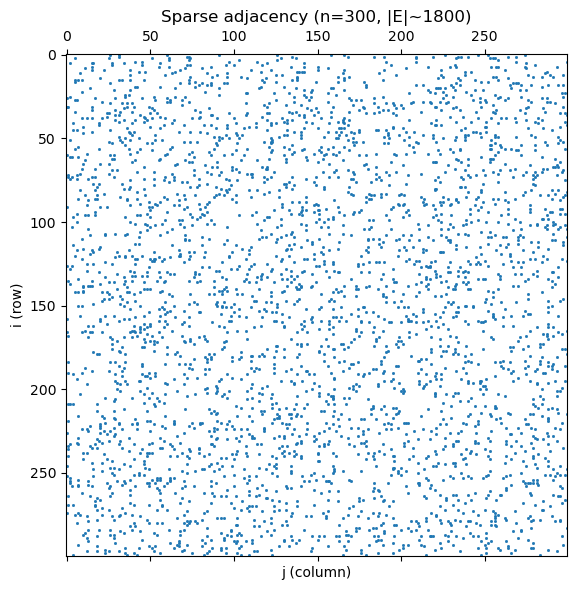

In [10]:
import numpy as np
import scipy.sparse as sp
import matplotlib.pyplot as plt
from pathlib import Path

def build_adj(num_nodes, edges, weights=None, undirected=True, self_loops=False):
    """
    构建（可选无向）稀疏邻接矩阵（CSR）。
    - num_nodes: 节点数
    - edges: 形如 [E, 2] 的 (src, dst) 边列表（0-based）
    - weights: 可选边权（默认全 1）
    - undirected: True 时做对称化（A = A OR A^T）
    - self_loops: 是否保留自环
    """
    edges = np.asarray(edges, dtype=np.int64)
    if edges.ndim != 2 or edges.shape[1] != 2:
        raise ValueError("edges must be an array of shape [E, 2]")
    if weights is None:
        weights = np.ones(edges.shape[0], dtype=np.float32)
    else:
        weights = np.asarray(weights)
        if weights.shape[0] != edges.shape[0]:
            raise ValueError("weights length must match number of edges")

    i, j = edges[:, 0], edges[:, 1]
    A = sp.coo_matrix((weights, (i, j)), shape=(num_nodes, num_nodes))

    if undirected:
        A = A + A.T
        A = A.sign()          # 二值化，避免重复计数

    if not self_loops:
        A.setdiag(0)
        A.eliminate_zeros()

    return A.tocsr()

def plot_sparse_adj(A, title="Sparse adjacency matrix", save_basepath=None):
    """
    可视化稀疏邻接矩阵（单个图）。
    - A: SciPy 稀疏矩阵
    - save_basepath: 若提供，将同时保存 PNG 与 SVG 文件（以该路径为前缀）
    """
    if not sp.issparse(A):
        raise TypeError("A must be a SciPy sparse matrix")

    plt.figure(figsize=(6, 6))
    plt.spy(A, markersize=1)       # 稀疏可视化
    plt.title(title)
    plt.xlabel("j (column)")
    plt.ylabel("i (row)")
    plt.tight_layout()

    if save_basepath is not None:
        save_basepath = Path(save_basepath)
        plt.savefig(save_basepath.with_suffix(".png"), dpi=300, bbox_inches="tight")
        plt.savefig(save_basepath.with_suffix(".svg"), bbox_inches="tight")
    plt.show()

# ---------- 示例：随机图 ----------
if __name__ == "__main__":
    rng = np.random.default_rng(42)
    num_nodes = 300
    num_edges = 1800  # 调小更稀疏，调大更稠密

    src = rng.integers(0, num_nodes, size=num_edges, dtype=np.int64)
    dst = rng.integers(0, num_nodes, size=num_edges, dtype=np.int64)
    edges = np.stack([src, dst], axis=1)

    A = build_adj(num_nodes, edges, undirected=True, self_loops=False)
    plot_sparse_adj(A, title=f"Sparse adjacency (n={num_nodes}, |E|~{num_edges})",
                    save_basepath="sparse_adj_matrix_demo")


STIXNonUnicode
DejaVu Serif Display
DejaVu Sans
DejaVu Sans Mono
STIXSizeOneSym
DejaVu Sans Display
STIXSizeThreeSym
STIXNonUnicode
DejaVu Serif
STIXSizeThreeSym
STIXGeneral
STIXSizeFourSym
DejaVu Sans Mono
STIXSizeFourSym
STIXNonUnicode
cmsy10
DejaVu Sans Mono
cmex10
cmtt10
DejaVu Serif
STIXSizeTwoSym
cmb10
cmr10
DejaVu Sans
DejaVu Serif
cmss10
STIXGeneral
DejaVu Sans
STIXSizeOneSym
cmmi10
STIXNonUnicode
DejaVu Serif
STIXGeneral
STIXGeneral
DejaVu Sans Mono
STIXSizeTwoSym
STIXSizeFiveSym
DejaVu Sans
Ubuntu
Source Code Pro
Ubuntu
Source Code Pro
Source Code Pro
Source Code Pro
Source Code Pro
Ubuntu Mono
Source Code Pro
Ubuntu
Ubuntu
Source Code Pro
Ubuntu Mono
Ubuntu Condensed
Source Code Pro
Ubuntu Mono
Source Code Pro
Source Code Pro
Inconsolata
Ubuntu
Ubuntu
Source Code Pro
Source Code Pro
Ubuntu
DejaVu Sans
Source Code Pro
Inconsolata
Ubuntu
Ubuntu
Ubuntu Mono
Source Code Pro
SimSun
SimSun
SimSun


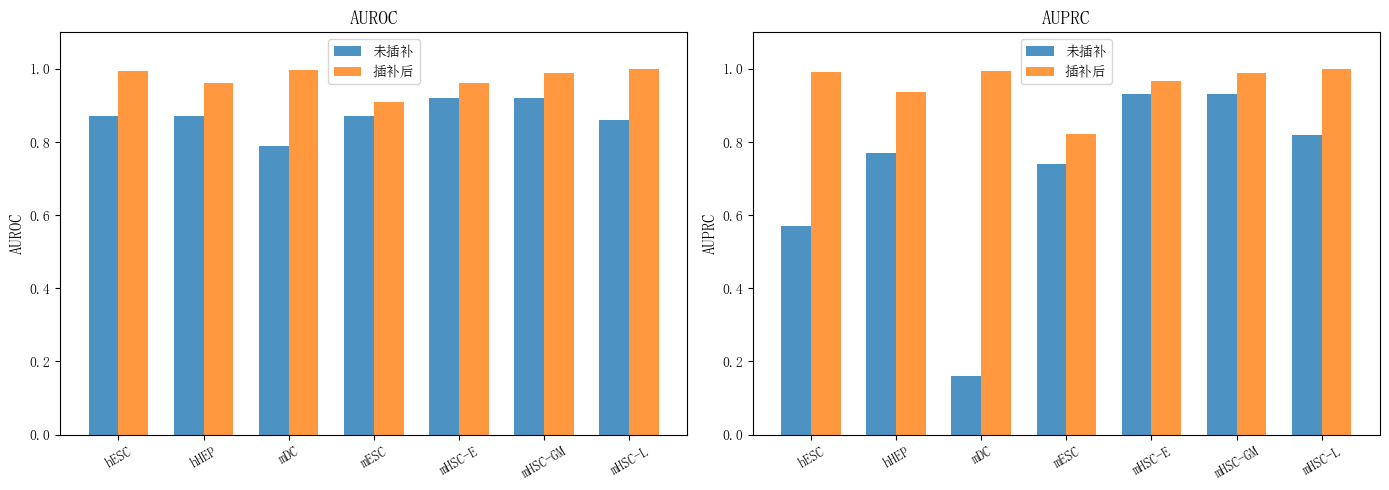

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.font_manager as fm


matplotlib.font_manager.fontManager.addfont('SimSun.ttf')

# 设置 Matplotlib 使用 SimHei 字体
matplotlib.rc('font', family='SimSun')

for font in fm.fontManager.ttflist:
    print(font.name)


matplotlib.rcParams['font.sans-serif'] = ['SimSun']
matplotlib.rcParams['axes.unicode_minus'] = False








# 1. 数据准备
cell_types = ["hESC", "hHEP", "mDC", "mESC", "mHSC-E", "mHSC-GM", "mHSC-L"]

# 插补后数据
auc_impute = [0.993213, 0.960223, 0.996210, 0.909176, 0.961966, 0.987618, 0.999989]
auprc_impute = [0.990726, 0.938189, 0.994483, 0.821798, 0.967078, 0.988702, 0.999987]

# 未插补数据
auc_raw = [0.87, 0.87, 0.79, 0.87, 0.92, 0.92, 0.86]
auprc_raw = [0.57, 0.77, 0.16, 0.74, 0.93, 0.93, 0.82]


# 2. 设置柱状图位置
x = np.arange(len(cell_types))
width = 0.35  # 两组柱之间的宽度

# 3. 绘制 AUROC 柱状图
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# AUROC
axes[0].bar(x - width / 2, auc_raw, width, label="未插补", alpha=0.8)
axes[0].bar(x + width / 2, auc_impute, width, label="插补后", alpha=0.8)
axes[0].set_ylabel("AUROC", fontsize=12)
axes[0].set_title("AUROC", fontsize=14)
axes[0].set_xticks(x)
axes[0].set_xticklabels(cell_types, rotation=30)
axes[0].set_ylim(0, 1.1)
axes[0].legend()

# 4. 绘制 AUPRC 柱状图
axes[1].bar(x - width / 2, auprc_raw, width, label="未插补", alpha=0.8)
axes[1].bar(x + width / 2, auprc_impute, width, label="插补后", alpha=0.8)
axes[1].set_ylabel("AUPRC", fontsize=12)
axes[1].set_title("AUPRC", fontsize=14)
axes[1].set_xticks(x)
axes[1].set_xticklabels(cell_types, rotation=30)
axes[1].set_ylim(0, 1.1)
axes[1].legend()

plt.tight_layout()
plt.show()
